### 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
x, y = make_moons(
    n_samples=1000,
    noise=0.4,
    random_state=20
)
x.shape, y.shape

((1000, 2), (1000,))

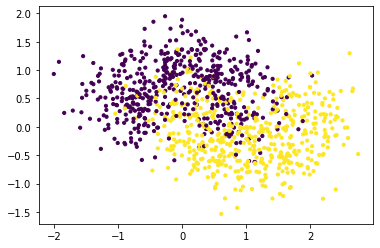

In [4]:
plt.scatter(x[:, 0], x[:, 1], c = y, s = 10)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

### 集成学习

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [7]:
clf = [
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(),
    GaussianNB()
]

In [8]:
for i in range(len(clf)):
    clf[i].fit(x_train, y_train)
    print(clf[i].score(x_test, y_test))

0.832
0.848
0.848


In [9]:
y_pred = np.zeros_like(y_test)
for i in range(len(clf)):
    y_pred += clf[i].predict(x_test)
y_pred[y_pred < 2] = 0
y_pred[y_pred >= 2] = 1
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.852

### sklearn中的集成学习

In [11]:
from sklearn.ensemble import VotingClassifier

In [12]:
clf = [
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(),
    GaussianNB()
]

In [13]:
vclf = VotingClassifier(
    estimators=[
        ('knn', clf[0]),
        ('lr', clf[1]),
        ('gnb', clf[2])
    ],
    voting='hard',
    n_jobs=-1
)
vclf.fit(x_train, y_train)
vclf.score(x_test, y_test)

0.852

In [14]:
vclf = VotingClassifier(
    estimators=[
        ('knn', clf[0]),
        ('lr', clf[1]),
        ('gnb', clf[2])
    ],
    voting='soft',
    n_jobs=-1
)
vclf.fit(x_train, y_train)
vclf.score(x_test, y_test)

0.868